# Lab | Revisiting Machine Learning Case Study


- In this lab, you will use `learningSet.csv` file which you already have cloned in today's activities. 

### Instructions

Complete the following steps on the categorical columns in the dataset:

- Check for null values in all the columns
- Exclude the following variables by looking at the definitions. Create a new empty list called `drop_list`. We will append this list and then drop all the columns in this list later:
    - `OSOURCE` - symbol definitions not provided, too many categories
    - `ZIP CODE` - we are including state already
- Identify columns that have over 85% missing values
- Remove those columns from the dataframe
- Reduce the number of categories in the column `GENDER`. The column should only have either "M" for males, "F" for females, and "other" for all the rest
    - Note that there are a few null values in the column. We will first replace those null values using the code below:

    ```python
    print(categorical['GENDER'].value_counts())
    categorical['GENDER'] = categorical['GENDER'].fillna('F')
    ```
    
# Lab | Feature engineering can be found at the bottom

### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 

### 2. Load Data

In [2]:
data = pd.read_csv('W7 - D1 - learningSet.csv')
data.shape

(95412, 481)

### 3. EDA

In [3]:
data.isnull().sum()

ODATEDW       0
OSOURCE       0
TCODE         0
STATE         0
ZIP           0
           ... 
MDMAUD_R      0
MDMAUD_F      0
MDMAUD_A      0
CLUSTER2    132
GEOCODE2    132
Length: 481, dtype: int64

### 4. Exclude the following variables by looking at the definitions. Create a new empty list called drop_list. We will append this list and then drop all the columns in this list later:

OSOURCE - symbol definitions not provided, too many categories
ZIP CODE - we are including state already

In [4]:
drop_list = ['OSOURCE','ZIP']
data.drop(columns=drop_list,axis=1,inplace=True)

### 5. Identify columns that have over 85% missing values

In [5]:
def filter_nulls(df, perc = .85):
    '''
    This function gets a dataframe, inspects the percentage of null values in each column
    and returns a list of those columns which has a percentage above the threshold value
    provided by the user. A default percentage value of 85% is assumed unless another value
    is provided in the function arguments.
    Inputs: 
        df: a dataframe to inspec
        [perc]: percentage of null values in each column
        Outputs:
            list of columns which have a percentage of null values above the specified thershold.'''
  
    nulls_percent_df = pd.DataFrame(df.isna().sum()/len(df)).reset_index()  
    nulls_percent_df.columns = ['column_name', 'nulls_percentage']
    columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>perc]
    drop_columns_list = list(columns_above_threshold['column_name'])
    return drop_columns_list

In [6]:
drop_columns_list = filter_nulls(data,perc=0.85)
drop_columns_list

['NUMCHLD',
 'RDATE_3',
 'RDATE_4',
 'RDATE_5',
 'RDATE_6',
 'RDATE_7',
 'RDATE_10',
 'RDATE_13',
 'RDATE_15',
 'RDATE_17',
 'RDATE_20',
 'RDATE_21',
 'RDATE_23',
 'RAMNT_3',
 'RAMNT_4',
 'RAMNT_5',
 'RAMNT_6',
 'RAMNT_7',
 'RAMNT_10',
 'RAMNT_13',
 'RAMNT_15',
 'RAMNT_17',
 'RAMNT_20',
 'RAMNT_21',
 'RAMNT_23']

### 6. Remove those columns from the dataframe

In [7]:
data = data.drop(columns = drop_columns_list, axis=1)
data.shape

(95412, 454)

### 7. Reduce the number of categories in the column GENDER. The column should only have either "M" for males, "F" for females, and "other" for all the rest



In [8]:
print(data['GENDER'].value_counts())

F    51277
M    39094
      2957
U     1715
J      365
A        2
C        2
Name: GENDER, dtype: int64


In [9]:
def clean_gender(df):
    '''This function will checkout the column 'GENDER' from a given dataframe 
       and it will replace the NA's or blankds by "other"
       Input:
         df: dataframe to perform the cleanup
       Output:
         df: dataframe with the 'GENDER' column values according to the new specficications.
    ''' 
        
    df2 = df.copy()
    df2['GENDER'] = np.where(df2['GENDER'].isin(['F','M']),df2['GENDER'],"other")

    return df2

In [10]:
data = clean_gender(data)
data['GENDER'].value_counts()

F        51277
M        39094
other     5041
Name: GENDER, dtype: int64

# Lab | Feature engineering

- In this lab, you will use `learningSet.csv` file which you have already cloned in the previous activities. 

### Instructions

Here we will work on cleaning some of the other columns in the dataset using the techniques that we used before in the lessons.

- Check for null values in the numerical columns.
- Use appropriate methods to clean the columns `GEOCODE2`, `WEALTH1`, `ADI`, `DMA`,and `MSA`.
- Use appropriate EDA technique where ever necessary.



In [15]:
numerical = data.select_dtypes(np.number)
categorical = data.select_dtypes(np.object)

In [16]:
df_num = pd.DataFrame(numerical.isna().sum()).reset_index()
df_num.columns = ['column_name', 'nulls']
df_num[df_num['nulls']>0]

,column_name,nulls
3,AGE,23665
4,INCOME,21286
5,WEALTH1,44732
7,MBCRAFT,52854
8,MBGARDEN,52854
...,...,...
361,RAMNT_22,74539
362,RAMNT_24,77674
373,NEXTDATE,9973
374,TIMELAG,9973


##### GEOCODE2

In [17]:
categorical['GEOCODE2'].value_counts()

A    34484
B    28505
D    16580
C    15524
       187
Name: GEOCODE2, dtype: int64

In [18]:
most = categorical['GEOCODE2'].value_counts(sorted).reset_index().iloc[0,0]

In [19]:
categorical['GEOCODE2'] = categorical['GEOCODE2'].fillna(most)

##### WEALTH1

In [20]:
numerical['WEALTH1'].value_counts()

9.0    7585
8.0    6793
7.0    6198
6.0    5825
5.0    5280
4.0    4810
3.0    4237
2.0    4085
1.0    3454
0.0    2413
Name: WEALTH1, dtype: int64

In [21]:
numerical['WEALTH1'] = numerical['WEALTH1'].astype('object') 

In [23]:
mode = numerical['WEALTH2'].value_counts(sorted).reset_index().iloc[0,0]

In [24]:
numerical['WEALTH1'] = numerical['WEALTH1'].fillna(mode)

##### ADI

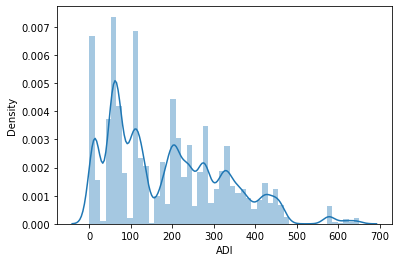

In [25]:
sns.distplot(numerical[numerical['ADI'].isna()==False]['ADI']) 
plt.show()

In [26]:
numerical['ADI'] = numerical['ADI'].fillna(np.mean(numerical['ADI']))

##### DMA

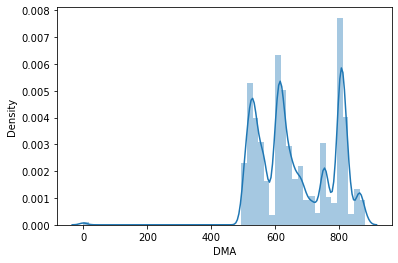

In [27]:
sns.distplot(numerical[numerical['DMA'].isna()==False]['DMA']) 
plt.show()

In [28]:
numerical['DMA'] = numerical['DMA'].fillna(np.mean(numerical['DMA']))

##### MSA

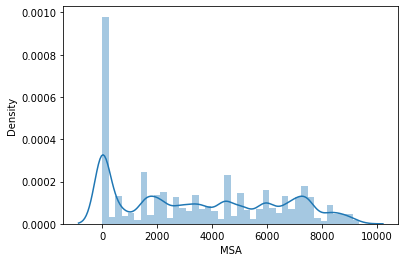

In [32]:
sns.distplot(numerical[numerical['MSA'].isna()==False]['MSA']) 
plt.show()

In [33]:
numerical['MSA'] = numerical['MSA'].fillna(np.mean(numerical['MSA']))